In [29]:
import sys
import os 
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tqdm import tqdm


plt.style.use('seaborn-v0_8-bright')

Import either Allensdk or Minisdk depending on your computer setup.

In [2]:
# Import Allen SDK

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

/Users/daniyarzakarin/miniconda3/envs/allenenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#If your computer is going low on RAM, commment the line above and use this instead:

sys.path.append('../')
from minisdk.core import EcephysProjectCache

Loading the necessary data. Run the cell depending on the environment you are using.

In [4]:
data_dir = "../allendata"
# Again, we might want to use another folder if we do want to overwrite potential data we have

In [5]:
data_dir = "../converted"

In [6]:
#From here on everything works with both AllenSDK and the MiniSDK!
manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

#Grab our (filtered) data from our favorite session. We take a female mice with nice unit count
session_id = 798911424 
oursession = cache.get_session_data(session_id)#, timeout=3000)

In [7]:
#Takes around 500 MB of disk space, a bit more once is decompressed in RAM
from minisdk.core import Allen2MiniConverter
converter = Allen2MiniConverter()
converter.write_metadata_csv(cache)
converter.write_session_data(oursession)

/Users/daniyarzakarin/Documents/Uni/computational neuroscience/project/notebooks/../minisdk/core.py:118: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sti = pd.read_csv(f"{self.path2data}/stimuli.csv", index_col="stimulus_presentation_id")


In [8]:
# Stimulus names
sti_table = oursession.get_stimulus_table()
sti_names = set(sti_table.stimulus_name)    
print(sti_names)

{'static_gratings', 'flashes', 'drifting_gratings_contrast', 'natural_movie_three', 'natural_scenes', 'natural_movie_one', 'gabors', 'spontaneous', 'drifting_gratings'}


/Users/daniyarzakarin/Documents/Uni/computational neuroscience/project/notebooks/../minisdk/core.py:118: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sti = pd.read_csv(f"{self.path2data}/stimuli.csv", index_col="stimulus_presentation_id")


In [9]:
for name in sti_names:
    print(f'There are {(sti_table["stimulus_name"] == name).sum()} stimuli with {name}')

There are 6000 stimuli with static_gratings
There are 150 stimuli with flashes
There are 540 stimuli with drifting_gratings_contrast
There are 36000 stimuli with natural_movie_three
There are 5950 stimuli with natural_scenes
There are 18000 stimuli with natural_movie_one
There are 3645 stimuli with gabors
There are 16 stimuli with spontaneous
There are 630 stimuli with drifting_gratings


In [19]:
mask = (sti_table['stimulus_name'] == 'natural_scenes')
natural_scenes = sti_table[mask]
del mask
natural_scenes.head()

,stimulus_block,start_time,stop_time,spatial_frequency,frame,y_position,x_position,color,phase,stimulus_name,temporal_frequency,contrast,size,orientation,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
51355,9.0,5909.794447,5910.044666,NaN,13.0,NaN,NaN,NaN,NaN,natural_scenes,NaN,NaN,NaN,NaN,0.250219,4908
51356,9.0,5910.044666,5910.294885,NaN,38.0,NaN,NaN,NaN,NaN,natural_scenes,NaN,NaN,NaN,NaN,0.250219,4909
51357,9.0,5910.294885,5910.545104,NaN,30.0,NaN,NaN,NaN,NaN,natural_scenes,NaN,NaN,NaN,NaN,0.250219,4910
51358,9.0,5910.545104,5910.795324,NaN,35.0,NaN,NaN,NaN,NaN,natural_scenes,NaN,NaN,NaN,NaN,0.250219,4911
51359,9.0,5910.795324,5911.045522,NaN,112.0,NaN,NaN,NaN,NaN,natural_scenes,NaN,NaN,NaN,NaN,0.250198,4912


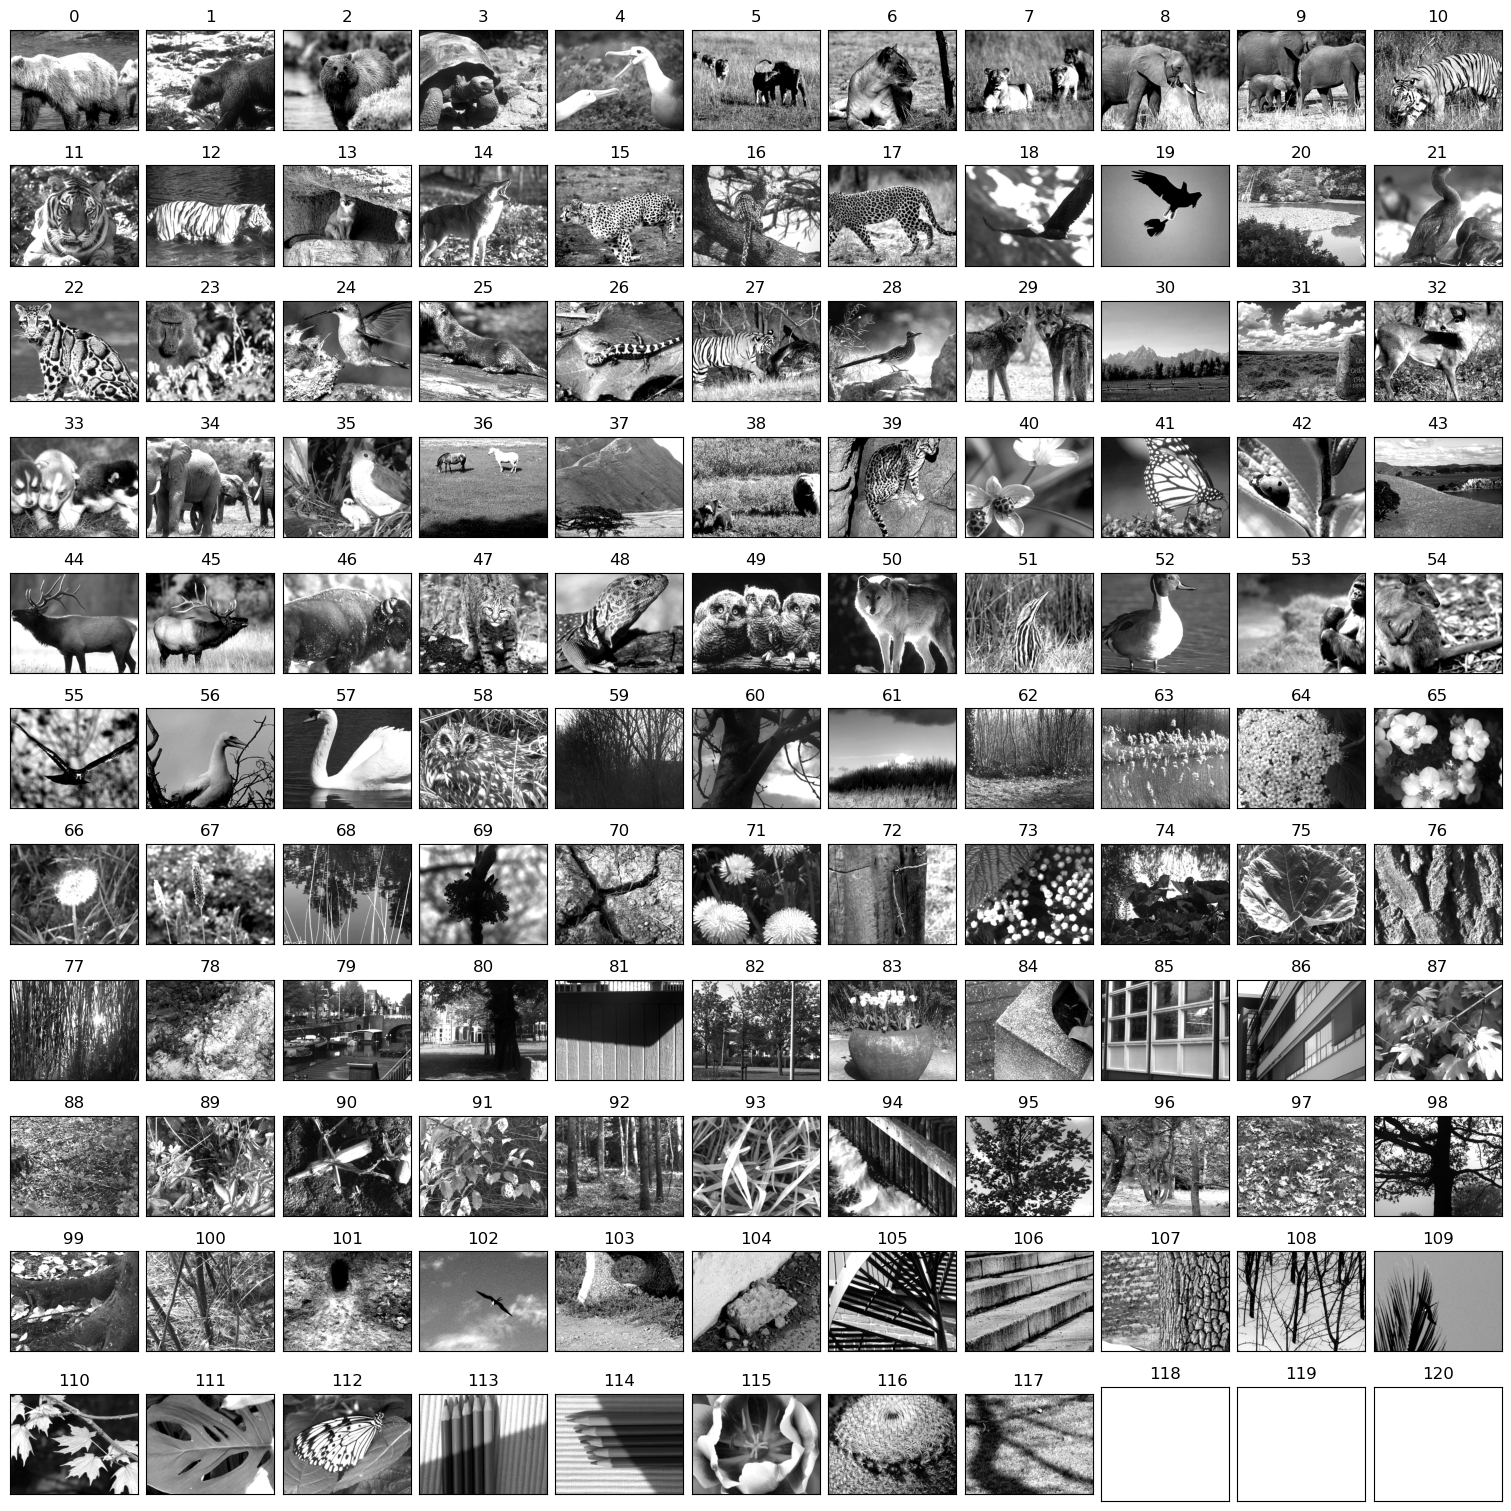

In [15]:
#Download the 118 photos of the natural scenes. 
#First time they need to be downloaded.
nphotos = 118
for i in range(nphotos):
    tmp = cache.get_natural_scene_template(i)
del tmp

#Convert them to use with the MiniSDK if needed
#converter.write_natural_images()
#Let's create a beautiful 11x11 reference plot with all the images
fig, axes = plt.subplots(ncols=11, nrows=11, figsize=(15,15), layout="constrained")
L = 11
for x in range(L):
    for y in range(L):
        index = y + x*L 
        axes[x,y].set_title(index)
        axes[x,y].set_xticks([])
        axes[x,y].set_yticks([])
        if index < 118:
            axes[x,y].imshow(cache.get_natural_scene_template(index), cmap="gray")

plt.savefig("natural_scenes.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [10]:
#Get the ids of the images and the units 
image_ids = oursession.get_stimulus_table("natural_scenes").index.values
visam_ids = oursession.units[oursession.units["ecephys_structure_acronym"]=="VISam"].index.values

print(f'We have {image_ids.shape[0]} images and {visam_ids.shape[0]} units')

We have 5950 images and 135 units


/Users/daniyarzakarin/Documents/Uni/computational neuroscience/project/notebooks/../minisdk/core.py:118: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sti = pd.read_csv(f"{self.path2data}/stimuli.csv", index_col="stimulus_presentation_id")


In [11]:
image_ids

array([51355, 51356, 51357, ..., 68226, 68227, 68228])

In [12]:
natural_scenes.loc[51355]

stimulus_block                      9.0
start_time                  5909.794447
stop_time                   5910.044666
spatial_frequency                   NaN
frame                              13.0
y_position                          NaN
x_position                          NaN
color                               NaN
phase                               NaN
stimulus_name            natural_scenes
temporal_frequency                  NaN
contrast                            NaN
size                                NaN
orientation                         NaN
duration                       0.250219
stimulus_condition_id              4908
Name: 51355, dtype: object

In [16]:
def get_n_spikes_in_time_interval(session, regionstr, time_start, time_end):
    #Filter neurons in the desired region
    #IDs of these neuron are set as the indices of the units table
    region_ids = session.units[session.units["ecephys_structure_acronym"]==regionstr].index.values

    #Get the spike times as a list of numpy arrays instead of dictionary
    #spike_times[id] is a numpy array
    region_spikes = {}
    for id in region_ids:
        #Filter spikes in the interval (time_start, time_end) ms.
        #A single neuron can have 20000 spikes, and eventplot would struggle
        spikes = session.spike_times[id]
        region_spikes[id] = len(spikes[(spikes > time_start) & (spikes < time_end)])

    return region_spikes

import bisect
def get_n_spikes_in_time_interval_with_bisect(session, regionstr, time_start, time_end):
    #Filter neurons in the desired region
    #IDs of these neuron are set as the indices of the units table
    region_ids = session.units[session.units["ecephys_structure_acronym"]==regionstr].index.values

    #Get the spike times as a list of numpy arrays instead of dictionary
    #spike_times[id] is a numpy array
    region_spikes = {}
    for id in region_ids:
        #Filter spikes in the interval (time_start, time_end) ms.
        #A single neuron can have 20000 spikes, and eventplot would struggle
        spikes = session.spike_times[id]
        R = bisect.bisect_left(spikes, time_end)
        L = bisect.bisect_left(spikes, time_start)
        region_spikes[id] = R - L

    return region_spikes


In [17]:
def get_spike_vectors(session, delay : float, stimuli : pd.DataFrame, regionstr : str, window_size : float = None):
    """Should return a DataFrame where each line corresponds to a vector of 
    spike numbers for each unit. Could be optimized!"""
    sti_ids = stimuli.index.values
    rows = []
    for sti_id in sti_ids:
        stimulus = stimuli.loc[sti_id]
        if window_size is None:
            region_spikes = get_n_spikes_in_time_interval_with_bisect(session, 
                                                        regionstr, 
                                                        stimulus.start_time + delay, 
                                                        stimulus.stop_time + delay)
        else:
            region_spikes = get_n_spikes_in_time_interval_with_bisect(session, 
                                                        regionstr, 
                                                        stimulus.start_time + delay, 
                                                        stimulus.start_time + delay + window_size)
        new_row = pd.DataFrame(region_spikes, index = [sti_id])
        rows.append(new_row)
    spike_vectors = pd.concat(rows)
    return spike_vectors

In [20]:
spike_vectors = get_spike_vectors(oursession, 0.0, natural_scenes, "VISam")

In [21]:
spike_vectors

,951092050,951092075,951092303,951092398,951092369,951092410,951092450,951092437,951092475,951092488,...,951098487,951098546,951098530,951098560,951098658,951098850,951098807,951098773,951098871,951098928
51355,6,2,3,2,2,0,3,19,0,2,...,0,0,1,6,0,1,9,9,0,11
51356,10,3,4,3,4,0,1,20,0,0,...,0,0,0,1,0,0,12,11,2,8
51357,8,0,4,4,4,0,3,17,0,0,...,0,0,2,4,0,1,9,6,0,8
51358,9,5,2,8,5,1,9,10,0,4,...,0,0,4,3,2,1,18,9,2,10
51359,7,1,2,6,7,0,6,10,0,5,...,0,0,5,3,5,0,10,6,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68224,1,5,3,0,5,2,0,0,0,6,...,0,1,0,0,0,0,1,0,0,3
68225,1,6,1,0,7,2,2,6,0,4,...,2,0,0,2,0,1,5,9,0,7
68226,0,7,4,0,6,1,0,9,0,1,...,0,0,0,7,0,0,2,2,1,6
68227,5,1,5,0,7,3,1,3,0,0,...,0,0,0,5,0,1,4,1,0,9


In [22]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

Experiment with delay. 

In [23]:
def experiment_with_delay(delay : float, stimuli : pd.DataFrame, regionstr : str = "VISam", window_size : float = None, withlogs = True):
    spike_vectors = get_spike_vectors(oursession, delay, stimuli, regionstr, window_size)
    
    #Find the frame that corresponds to the presentation id and convert it to int numpy array.
    targets = stimuli.loc[image_ids, "frame"] # right now works only with natural_scenes!
    targets = targets.values.astype(int)
    labels = np.unique(targets)  #There should be 118 labels, one per image.

    #The codification of the images, as a 2D numpy array instead 
    spikes_presentation = spike_vectors.values.astype(float)

    #Initialize the vectors
    accuracies = []
    confusions = []

    #KFold.split automatically splits our big table into n_splits parts. Training then is done with n_splits-1 
    #parts and the remaining one is used for test. The procedure then is cross-validated.
    for train_indices, test_indices in KFold(n_splits=5).split(spikes_presentation):
        
        #Generate the Support Vector Machine and fit it using the training dataset
        clf = svm.SVC(gamma="scale", kernel="rbf")
        clf.fit(spikes_presentation[train_indices], targets[train_indices])
        
        #Get the test set and try to predict over it
        test_targets = targets[test_indices]
        test_predictions = clf.predict(spikes_presentation[test_indices])
        
        #Compute the accuracy on this test set and save all of them
        accuracy = 1 - (np.count_nonzero(test_predictions - test_targets) / test_predictions.size)
        
        accuracies.append(accuracy)
        confusions.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=labels))

    # #Get the mean!
    if withlogs:
        print(f"Cross-validated mean accuracy: {100*np.mean(accuracies):.1f}%")
        print(f"Ch?ance of random guess: {100/labels.size:.2f}%") #1/118 
    return 100*np.mean(accuracies)

In [20]:
experiment_with_delay(0.0, natural_scenes)

Cross-validated mean accuracy: 19.1%
Ch?ance of random guess: 0.84%


19.092436974789916

In [21]:
delays = np.arange(0.25, 0.50, 0.05)
accuracies = []
for delay in delays:
    accuracies.append(experiment_with_delay(delay, natural_scenes))

Cross-validated mean accuracy: 4.2%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 1.9%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 1.2%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 0.9%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 0.7%
Ch?ance of random guess: 0.84%


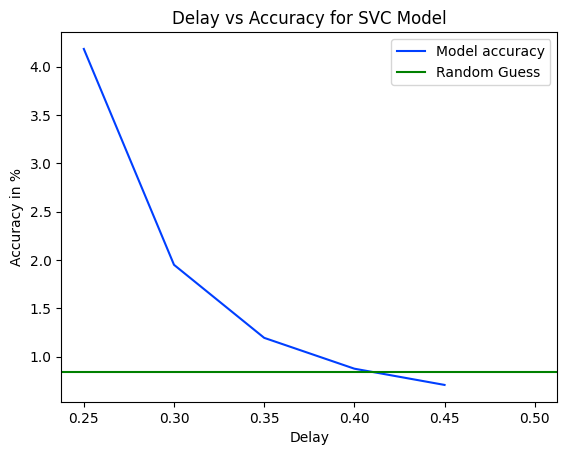

In [22]:
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model')
plt.plot(delays, accuracies, label = 'Model accuracy')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.legend()
plt.show()

In [23]:
delays = np.arange(0.0, 0.50, 0.025)
accuracies = []
for delay in delays:
    accuracies.append(experiment_with_delay(delay, natural_scenes))

Cross-validated mean accuracy: 19.1%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 24.1%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 28.9%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 31.5%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 32.1%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 27.5%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 19.7%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 13.8%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 9.4%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 6.5%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 4.2%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 2.8%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 1.9%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 1.6%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 1.2%
Ch?ance of random 

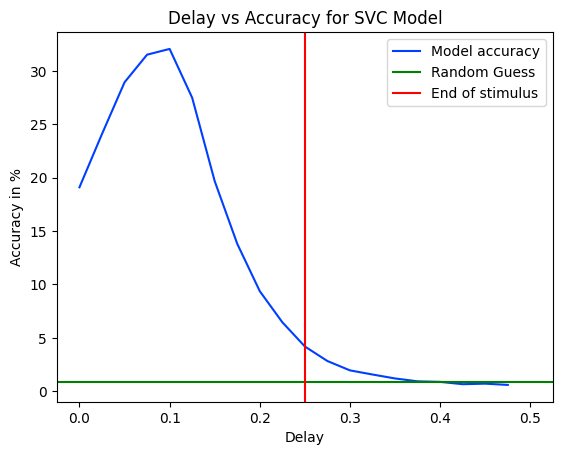

In [24]:
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model')
plt.plot(delays, accuracies, label = 'Model accuracy')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.legend()
plt.show()

# Trying lower window sizes 

It is possible that the initial increase in accurary is due to some statistical effects. We can do a similiar experiment trying a smaller window size. In theory we should observe the same phenomenon

In [26]:
delays = np.arange(0.0, 0.50, 0.025)
window_size = 0.05
accuracies = []
for delay in delays:
    accuracies.append(experiment_with_delay(delay, natural_scenes, window_size))
    

Cross-validated mean accuracy: 0.8%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 0.9%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 3.4%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 11.2%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 18.5%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 18.4%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 13.7%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 11.9%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 10.9%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 11.3%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 10.5%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 8.2%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 5.5%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 3.5%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 1.8%
Ch?ance of random 

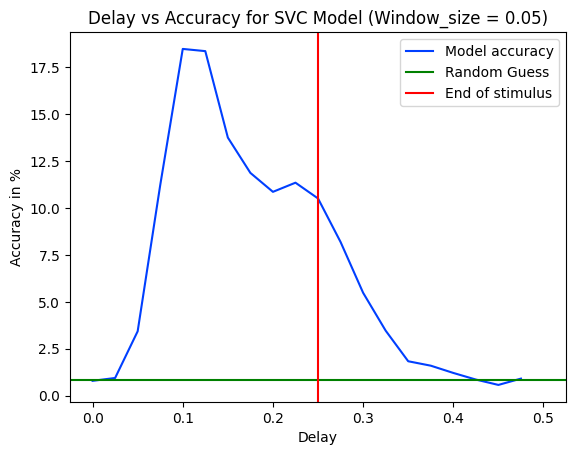

In [27]:
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model (Window_size = 0.05)')
plt.plot(delays, accuracies, label = 'Model accuracy')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.legend()
plt.show()

idea : in one graph several of those for different window sizes...

idea: finding optimal window size.... 

idea: plot the variance of the labels.... then maybe we need to apply normalization <- heatmap

In [50]:
window_sizes = np.arange(0.05, 0.25 + 1e-5, 0.05)
result_per_window_size = {}

print(f'Window sizes : {list(window_sizes)}')
for window_size in window_sizes:
    delays = np.arange(0.0, 0.50, 0.025)
    accuracies = []
    for delay in tqdm(delays, desc=f"Calculating accurary curve for window_size = {window_size}..."):
        accuracies.append(experiment_with_delay(delay, natural_scenes, "VISam", window_size, withlogs = False))
    result_per_window_size[window_size] = (delays, accuracies)

Window sizes : [0.05, 0.1, 0.15000000000000002, 0.2, 0.25]


Calculating accurary curve for window_size = 0.05...: 100%|██████████| 20/20 [12:39<00:00, 37.98s/it]
Calculating accurary curve for window_size = 0.1...: 100%|██████████| 20/20 [12:15<00:00, 36.78s/it]
Calculating accurary curve for window_size = 0.15000000000000002...: 100%|██████████| 20/20 [12:20<00:00, 37.01s/it]
Calculating accurary curve for window_size = 0.2...: 100%|██████████| 20/20 [12:40<00:00, 38.03s/it]
Calculating accurary curve for window_size = 0.25...: 100%|██████████| 20/20 [56:09<00:00, 168.46s/it]  


Heatmap of the variance. One the x-axis we have the delay. On the y-axis we have the window size. 

In [61]:
import pickle

# Export dictionary to a JSON file
with open('cashed_data/result_per_window_size.pickle', 'wb') as pickle_file:
    pickle.dump(result_per_window_size, pickle_file)


In [63]:
with open('cashed_data/result_per_window_size.pickle', 'rb') as pickle_file:
    result_per_window_size = pickle.load(pickle_file)

result_per_window_size

{0.05: (array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
         0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
         0.45 , 0.475]),
  [0.7899159663865517,
   0.941176470588232,
   3.4285714285714275,
   11.210084033613443,
   18.47058823529412,
   18.352941176470587,
   13.747899159663865,
   11.865546218487392,
   10.857142857142858,
   11.344537815126051,
   10.504201680672269,
   8.184873949579833,
   5.478991596638656,
   3.4621848739495786,
   1.831932773109244,
   1.5966386554621859,
   1.2100840336134433,
   0.8571428571428541,
   0.5714285714285694,
   0.9075630252100808]),
 0.1: (array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
         0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
         0.45 , 0.475]),
  [1.8655462184873972,
   6.890756302521011,
   15.126050420168069,
   23.26050420168067,
   27.10924369747899,
   25.41176470588235,
   23.210084033613448,
   20.840336134453782,
   17.98319327

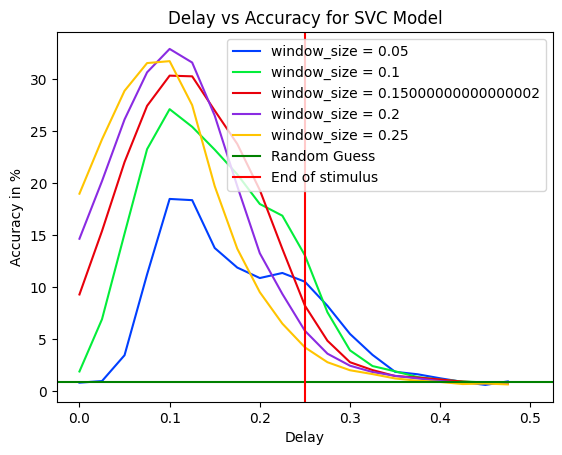

In [64]:
for window_size, result in result_per_window_size.items():
    plt.plot(result[0], result[1], label = f'window_size = {window_size}')
    
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.title('Delay vs Accuracy for SVC Model')
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.legend()
plt.show()

There is this weird inverse effect on the tail. The windows sizes with highest accuracy have the retention.

In [40]:
window_sizes = np.round(np.arange(0.05, 0.25 + 1e-5, 0.05), 2)
delays = np.round(np.arange(0.0, 0.50, 0.025), 2) 

mesh = np.meshgrid(window_sizes, delays)

variance_hm = []
for window_size, delay in tqdm(tuple(zip(mesh[0].flatten(), mesh[1].flatten())), desc="Computing variance heatmap values..."):
    spike_vectors = get_spike_vectors(oursession, delay, natural_scenes, "VISam", window_size)
    spikes_presentation = spike_vectors.values.astype(float)
    variance_hm.append(spikes_presentation.var())

variance_hm = np.array(variance_hm).reshape(window_sizes.shape[0], delays.shape[0])

Computing variance heatmap values...:   0%|          | 0/100 [00:00<?, ?it/s]

Computing variance heatmap values...: 100%|██████████| 100/100 [09:52<00:00,  5.92s/it]

[0.37422011907159364, 1.0178358323822387, 2.1806709919461373, 3.6298012664803525, 5.359609497955174, 0.35635249590167684, 1.0568706442542157, 2.233136695743415, 3.6577261828381795, 5.394184105566311, 0.34998755580508656, 1.170353417572887, 2.303457413569544, 3.7335522642207204, 5.479110469435317, 0.4314489856185515, 1.2836479791881898, 2.4114455411895084, 3.866908285643572, 5.522232188474132, 0.48105091659747906, 1.3078769343318053, 2.439996532474622, 3.9004619887031056, 5.500845900823269, 0.46849365149535954, 1.2561443967201016, 2.3723511527541046, 3.757951466749277, 5.452282121591896, 0.41433839263287014, 1.1576814182563853, 2.238024009899869, 3.5082579028005303, 5.378528173341865, 0.3863888608069711, 1.1094492591106637, 2.099898666567474, 3.4994754752933845, 5.330880255310451, 0.380250037163643, 1.096142674198704, 2.0512977180608387, 3.5584262882305167, 5.320229114314912, 0.37797663726405595, 1.0605650308088381, 2.0810086609144745, 3.5940939169668358, 5.32270749933515, 0.37435981651

In [41]:
# Export dictionary to a pickle file
with open('cashed_data/variance_heatmanp.pickle', 'wb') as pickle_file:
    pickle.dump(variance_hm, pickle_file)

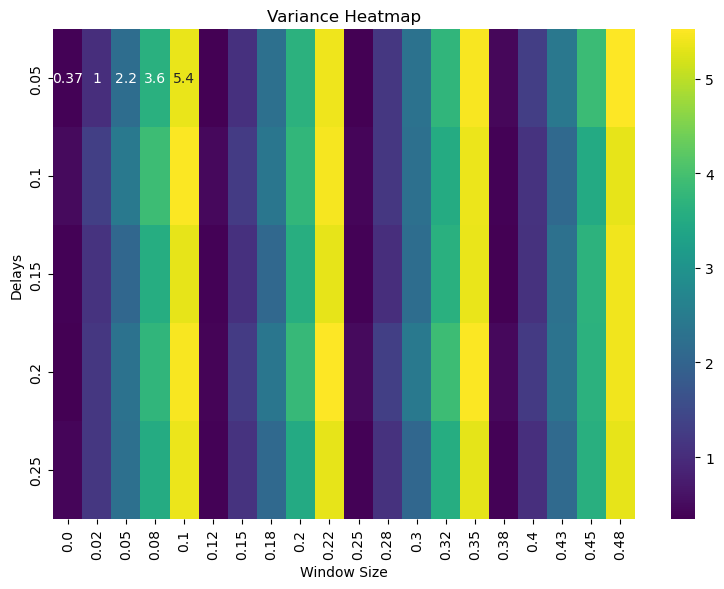

In [52]:
with open('cashed_data/variance_heatmanp.pickle', 'rb') as pickle_file:
    variance_hm = pickle.load(pickle_file)

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(variance_hm, annot=True, cmap='viridis', xticklabels=delays, yticklabels=window_sizes)  # 'viridis' is just one of many available colormaps
plt.title('Variance Heatmap')
plt.xlabel('Window Size')
plt.ylabel('Delays')
plt.tight_layout()
plt.show()

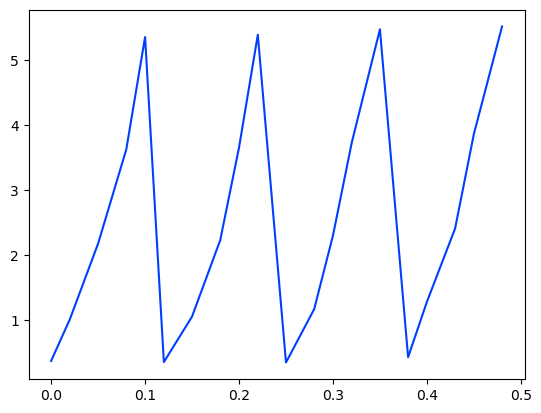

In [45]:
plt.plot(delays, variance_hm[0])